In [104]:
class Field:
    def __init__(self, size, item_pickup, item_drop_off, start_position):
        self.size = size
        self.item_pickup = item_pickup
        self.item_drop_off = item_drop_off
        self.position = start_position
        self.item_in_car = False
    
    def get_number_of_states(self):
        return self.size * self.size * self.size * self.size * 2    # the position of pickup item can be anywhare with fix drop off position
    
    def get_state(self):
        state = self.position[0] * self.size * self.size * self.size * 2
        state = state + self.position[1] * self.size * self.size * 2
        state = state + self.item_pickup[0] * self.size * 2
        state = state + self.item_pickup[1] * 2
        if self.item_in_car:
            state = state + 1
        return state
    
    def make_action(self, action):
        (x, y) = self.position
        if action == 0: # Go south
            if y == self.size - 1:
                return -10, False
            else:
                self.position = (x, y + 1)
                return -0.01, False
        elif action == 1:   # Go north
            if y == 0:
                return -10, False
            else:
                self.position = (x, y - 1)
                return -0.01, False
        elif action == 2:   # Go east
            if x == 0:
                return -10, False
            else:
                self.position = (x - 1, y)
                return -0.01, False
        elif action == 3:   # Go west
            if x == self.size - 1:
                return -10, False
            else:
                self.position = (x + 1, y)
                return -0.01, False
        elif action == 4:   # Pickup item
            if self.item_in_car:
                return -10, False
            elif self.item_pickup != (x, y):
                return -10, False
            else:
                self.item_in_car = True
                return 20, False
        elif action == 5:   # Drop item
            if not self.item_in_car:
                return -10, False
            elif self.item_drop_off != (x, y):
                self.item_pickup = (x, y)
                self.item_in_car = False
                return -10, False
            else:
                return 20, True
            


In [7]:
field = Field(10, (0, 0), (9, 9), (9, 0))

field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)
field.make_action(2)

field.make_action(4)

field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)
field.make_action(0)

field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)
field.make_action(3)

field.make_action(5)


(20, True)

In [8]:
field.position

(9, 9)

Naive Solution

In [105]:
import random

In [106]:
def naive_solution():
    size = 10
    item_start = (0, 0)
    item_drop_off = (9, 9)
    start_position = (9, 0)

    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    steps = 0

    while not done:
        action = random.randint(0, 5)
        reward, done = field.make_action(action)
        steps = steps + 1

    return steps


In [108]:
naive_solution()

92262

In [14]:
runs = [naive_solution() for _ in range(500)]
sum(runs)/len(runs)

152066.462

 #### Algorithm
- Initialise the **Q-table** to all zeros,
- Iterate,
    - Agent is in state **state**,
    - With probability **epsilon** choose to **explore**, else **exploit**,
        - If **explore**, then choose a *random* **action**,
        - If **exploit**, then choose the *best* **action** based on the current **Q-table**,
    - Update the **Q-table** from the new **reward** to the previous state,
    - Q[**state, action**] = (1 – **alpha**) * Q[**state, action**] + **alpha** * (**reward + gamma** * max(Q[**new_state**]) — Q[**state, action**])

In [109]:
import numpy as np
from matplotlib import pyplot as plt

In [110]:
size = 10
item_start = (0, 0)
item_drop_off = (9, 9)
start_position = (0, 9)

field = Field(size, item_start, item_drop_off, start_position)
done = False

number_of_states = field.get_number_of_states()
number_of_actions = 6

q_table = np.zeros((number_of_states, number_of_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.6
reward_history = []
number_of_steps = []


for _ in range(10000):
    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    
    reward_total = 0
    steps = 0
    while not done:
        state = field.get_state()
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 5)
        else:
            action = np.argmax(q_table[state])
        
        reward, done = field.make_action(action)
        reward_total = reward_total + reward
        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * new_state_max - q_table[state, action])
        steps = steps + 1
    reward_history.append(reward_total)
    number_of_steps.append(steps)

In [111]:
number_of_steps

[26921,
 3163,
 443,
 1937,
 3929,
 420,
 1506,
 1062,
 481,
 3984,
 76,
 872,
 2649,
 1246,
 2433,
 2077,
 273,
 1086,
 1867,
 803,
 445,
 282,
 303,
 958,
 966,
 281,
 1117,
 274,
 866,
 165,
 520,
 183,
 429,
 296,
 2042,
 2383,
 1060,
 540,
 474,
 585,
 150,
 1417,
 450,
 77,
 1291,
 130,
 386,
 950,
 1671,
 4063,
 587,
 196,
 149,
 692,
 599,
 186,
 314,
 177,
 280,
 161,
 894,
 2086,
 68,
 566,
 699,
 400,
 115,
 634,
 690,
 181,
 98,
 138,
 254,
 217,
 967,
 561,
 648,
 664,
 1176,
 183,
 99,
 248,
 625,
 131,
 1243,
 227,
 1810,
 166,
 184,
 764,
 77,
 130,
 87,
 220,
 208,
 353,
 60,
 75,
 142,
 374,
 184,
 2325,
 464,
 91,
 606,
 266,
 244,
 63,
 372,
 199,
 890,
 120,
 379,
 552,
 65,
 1103,
 127,
 185,
 312,
 65,
 69,
 359,
 120,
 210,
 237,
 269,
 69,
 81,
 178,
 125,
 1005,
 48,
 471,
 657,
 76,
 248,
 141,
 99,
 985,
 77,
 282,
 429,
 99,
 91,
 150,
 139,
 133,
 190,
 121,
 236,
 250,
 376,
 73,
 278,
 302,
 236,
 276,
 193,
 118,
 132,
 228,
 160,
 439,
 333,
 197,
 51,

<function matplotlib.pyplot.show(close=None, block=None)>

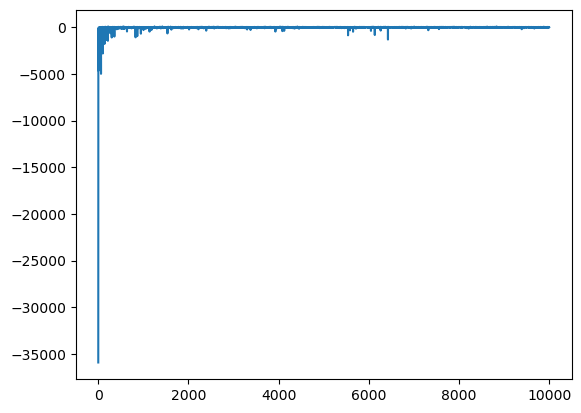

In [112]:
plt.plot(reward_history)
plt.show

In [44]:
q_table

array([[ 0.23071429, -2.06428571, -2.06428571,  0.23071429,  9.78571429,
        -2.06428571],
       [-0.71428571, -5.21428571, -5.21428571, -0.71428571, -5.21428571,
        -2.06428571],
       [ 2.43571429, -2.93018629, -3.2036518 , -0.33188607, -3.19814692,
        -2.95570466],
       ...,
       [-0.76231603,  0.44285118,  0.45555028, -0.83135253, -0.78889459,
        14.28571429],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

In [113]:
def reinforcement_learning():
    epsilon = 0.1
    alpha = 0.1
    gamma = 0.6

    field = Field(size, item_start, item_drop_off, start_position)
    done = False
    steps = 0

    while not done:
        state = field.get_state()
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 5)
        else:
            action = np.argmax(q_table[state])
        
        reward, done = field.make_action(action)

        new_state = field.get_state()
        new_state_max = np.max(q_table[new_state])
        
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * new_state_max - q_table[state, action])

        steps = steps + 1
    return steps

In [121]:
reinforcement_learning()

32

In [117]:
runs_rl = [reinforcement_learning() for _ in range(1000)]
sum(runs_rl)/len(runs_rl)

40.884